<h1>Sorting Basics</h1>
<p>Algorythmic analysis typically uses the task of sorting a list of integers.  An algorythm is considered bad if it operates O(n^2).</p>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from scipy.optimize import curve_fit

<h2>Create timing decoratore</h2>

In [2]:
import time                                                
 
def timeit(method):
 
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
 
        print("{0} took {1:0.3e} seconds".format(method.__name__, te-ts))
        return (result, te-ts)
 
    return timed

<h2>Define sort functions</h2>
<p>We define bubble, shuffle sort, and merge sort.</p>

In [3]:
#n.b. this is optimized bubble sort
@timeit
def bubble_sort(l_in):
    n = len(l_in)
    while n > 0:
        newn = 0
        for i in range(1, n):
            if l_in[i-1] > l_in[i]:
                l_in[i], l_in[i-1] = l_in[i-1], l_in[i]
                newn = i
        n = newn

def combine(left, right):
    r_list = []
    l, r = 0, 0
    while l<len(left) and r< len(right):
        if left[l] < right[r]:
            r_list.append(left[l])
            l+=1
        else:
            r_list.append(right[r])
            r+=1
    if l==len(left):
        r_list.extend(right[r:])
    else:
        r_list.extend(left[l:])
    return r_list
 
def merge_sort(l_in):
    if len(l_in) == 1:
        return l_in
    pivot = int(len(l_in)/2)
    left = merge_sort(l_in[:pivot])
    right = merge_sort(l_in[pivot:])
    return combine(left, right)

@timeit
def wrap_merge(l_in):
    return merge_sort(l_in)

<h2>Unit Test</h2>

In [4]:
the_list = [4, 1, 3, 2]
list_cpy = copy(the_list)


print(wrap_merge(the_list))
print(the_list)
print(bubble_sort(the_list))
print(the_list)

wrap_merge took 2.003e-05 seconds
([1, 2, 3, 4], 2.002716064453125e-05)
[4, 1, 3, 2]
bubble_sort took 1.311e-05 seconds
(None, 1.3113021850585938e-05)
[1, 2, 3, 4]


<h2>Plot Time Complexity</h2>

In [24]:
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
t_m, t_b = [], []

for n in sizes:
    print("N: ", n)
    the_list = np.random.randint(10000, size=n)
    t_m.append(wrap_merge(the_list)[1])
    t_b.append(bubble_sort(the_list)[1])
    print("\n")

N:  10
wrap_merge took 1.092e-04 seconds
bubble_sort took 6.390e-05 seconds


N:  20
wrap_merge took 1.998e-04 seconds
bubble_sort took 2.179e-04 seconds


N:  50
wrap_merge took 2.711e-04 seconds
bubble_sort took 5.980e-04 seconds


N:  100
wrap_merge took 5.848e-04 seconds
bubble_sort took 3.493e-03 seconds


N:  200
wrap_merge took 1.893e-03 seconds
bubble_sort took 1.152e-02 seconds


N:  500
wrap_merge took 5.546e-03 seconds
bubble_sort took 8.084e-02 seconds


N:  1000
wrap_merge took 7.518e-03 seconds
bubble_sort took 2.943e-01 seconds


N:  2000
wrap_merge took 1.544e-02 seconds
bubble_sort took 1.075e+00 seconds


N:  5000
wrap_merge took 4.479e-02 seconds
bubble_sort took 7.201e+00 seconds


N:  10000
wrap_merge took 9.092e-02 seconds
bubble_sort took 2.767e+01 seconds




In [29]:
def polynomial(x, b0, b1):
    return b0*x + b1*x*x

def lin_log(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * np.log2(x)

In [31]:
space = np.logspace(1, 5)

#lin_fit = list(np.polyfit(sizes, t_b, 2))
lin_fit, pcov = curve_fit(polynomial, sizes, t_b)
line_lin = [polynomial(x, lin_fit[0], lin_fit[1]) for x in space]

log_fit, pcov = curve_fit(lin_log, sizes, t_m)
line_log = [lin_log(x, log_fit[0], log_fit[1], log_fit[2]) for x in space]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


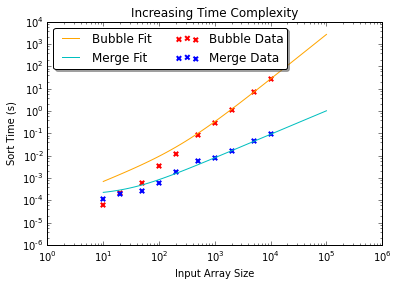

In [32]:
# Plot the data + line of best fit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sizes, t_b, color='r', marker='x', lw=2, label="Bubble Data")
ax.scatter(sizes, t_m, color='b', marker='x', lw=2, label="Merge Data")
plt.plot(space, line_lin, color='orange', label="Bubble Fit")
plt.plot(space, line_log, color='c', label="Merge Fit")
ax.set_xlabel('Input Array Size')
ax.set_ylabel('Sort Time (s)')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 10000)
ax.set_xlim(1, 1000000)
ax.set_title('Increasing Time Complexity')
plt.legend(loc="upper left", ncol=2, shadow=True, fancybox=True)
plt.show()

<h2>Questions</h2>
<p>
1.) What is the time complexity of merge sort? <br/>
2.) What is the space complexity of merge sort? <br/>
3.) Is merge sort a good solution for sorting large lists of numbers?
</p>

In [2]:
[1, 2, 4, 5, 7, 10, 14, 17]

[1, 2, 4, 5, 7, 10, 14, 17]